In [1]:
%matplotlib inline
import pandas as pd
import requests
import numpy as np
import seaborn as sns

from roc_results import results_5050 as results
import lob


In [2]:
response = requests.get('http://localhost:8000/result/')
rec = []
for r in response.json():
    if r.get('data_length') == 5050:
        svm = r.get('algorithm').get('svm')
        rec.append({
            'kernel': svm.get('kernel'),
            'c': svm.get('c'),
            'gamma': svm.get('gamma'),
            'coef0': svm.get('coef0'),
            'roc_auc_score': r.get('roc_auc_score'),
            'stock': r.get('stock')
        })
df = pd.DataFrame(rec)

In [3]:
len(df)

64892

In [4]:
log_res = []
for i, row in df.iterrows():
    log_res.append(results.get(row['stock']))
df['log_res'] = log_res
df['diff'] = df['roc_auc_score'] - log_res

In [5]:
print(len(df['stock'].unique()))
print(len(df[df['log_res'] < df['roc_auc_score']]['stock'].unique()))

98
76


In [36]:
print(df[df['log_res'] >= df['roc_auc_score']]['stock'].unique())

['10166' '9061' '2822' '11399' '2645' '2651' '9069' '9063' '2051' '9926'
 '1472' '1865' '9094' '9270' '1243' '4060' '1221' '2368' '12456' '12327'
 '2094' '9064' '9034' '2748' '9761' '1956' '12098' '11244' '1113' '10795'
 '13061' '10887' '11234' '9062' '1769' '7858' '4154' '4218' '13003' '9067'
 '10508' '2057' '12534' '1907' '4481' '4549' '4618' '3035' '11867' '4851'
 '2730' '12713' '3757' '10470' '9265' '4799' '11618' '1388' '9086' '9058'
 '11583' '2050' '2197' '9268' '12552' '9065' '2602' '3161' '9074' '4736'
 '3459' '13113' '2290' '9269' '12059' '3879' '1229' '5836' '10484' '2890'
 '1694' '1080' '3107' '11038' '12417' '9266' '4320' '3022' '3388' '8080'
 '1431' '12255' '11714' '4575' '2028' '11946' '2813' '11869']


In [6]:
df[df['log_res'] <= df['roc_auc_score']]

,c,coef0,gamma,kernel,roc_auc_score,stock,log_res,diff
64,0.005,0.0000,-1.0000,linear,0.547698,9061,0.523876,0.023823
72,0.500,0.0000,0.0050,rbf,0.544204,9061,0.523876,0.020328
73,0.500,0.0000,0.5000,rbf,0.565568,9061,0.523876,0.041692
74,0.500,0.0000,5.0000,rbf,0.560232,9061,0.523876,0.036356
75,0.500,0.0000,50.0000,rbf,0.565003,9061,0.523876,0.041128
76,0.500,0.0000,500.0000,rbf,0.541570,9061,0.523876,0.017695
77,0.500,0.0000,5000.0000,rbf,0.534145,9061,0.523876,0.010270
78,5.000,0.0000,-1.0000,linear,0.564845,9061,0.523876,0.040970
79,5.000,0.0000,0.0005,rbf,0.547698,9061,0.523876,0.023823
80,5.000,0.0000,0.0050,rbf,0.562340,9061,0.523876,0.038465


In [7]:
df.groupby('stock').aggregate({'roc_auc_score': np.max}).head()

,roc_auc_score
stock,
10166,0.572526
10470,0.622024
10484,0.575059
10508,0.586053
10795,0.635927


In [8]:
bests = []
df_best_agg = df.groupby('stock', as_index=False)['diff'].idxmax()
df_bests = df.loc[df_best_agg]
df_bests.index = df_bests['stock']

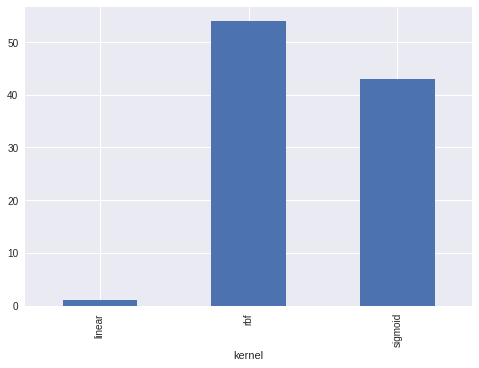

In [9]:
df_bests.groupby('kernel')['kernel'].count().plot(kind='bar')

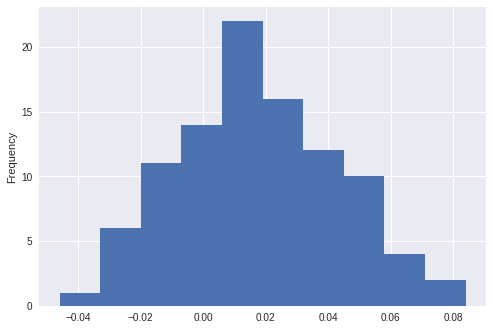

In [10]:
df_bests['diff'].plot(kind='hist')

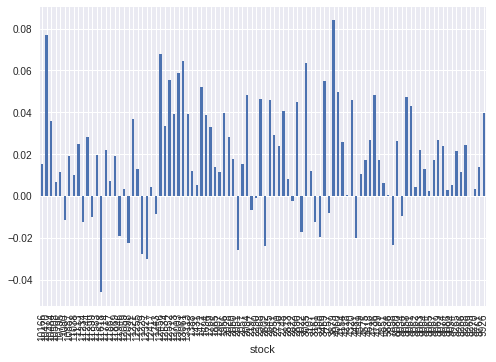

In [11]:
df_bests['diff'].plot(kind='bar')

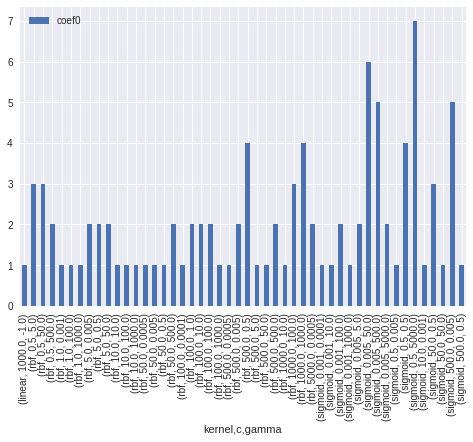

In [12]:
df_bests.groupby(['kernel', 'c', 'gamma'])[['coef0']].count().plot(kind='bar')

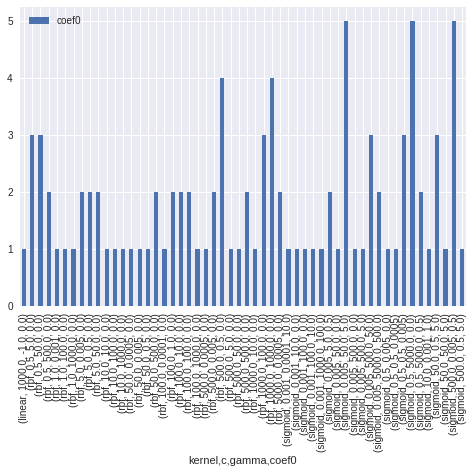

In [13]:
df_bests.groupby(['kernel', 'c', 'gamma', 'coef0'])[['coef0']].count().plot(kind='bar')

In [14]:
# TODO: mean square error by kernel for the bests? or for all


In [15]:
print(df_bests[df_bests['kernel'] == 'rbf']['diff'].median())
print(df_bests[df_bests['kernel'] == 'sigmoid']['diff'].median())
print(df_bests[df_bests['kernel'] == 'linear']['diff'].median())

0.013343802512331249
0.021480932400627206
-0.01703836664223357


In [16]:
print(df_bests[df_bests['kernel'] == 'rbf']['diff'].std())
print(df_bests[df_bests['kernel'] == 'sigmoid']['diff'].std())
print(df_bests[df_bests['kernel'] == 'linear']['diff'].std())

0.025528537848170267
0.025811709743191334
nan


In [17]:
print(df_bests[df_bests['kernel'] == 'rbf']['diff'].mean())
print(df_bests[df_bests['kernel'] == 'sigmoid']['diff'].mean())
print(df_bests[df_bests['kernel'] == 'linear']['diff'].mean())

0.017416989906481464
0.018541940793950464
-0.01703836664223357


In [18]:
print(df_bests[df_bests['kernel'] == 'rbf'][df_bests['diff'] < 0]['diff'].mean())
print(df_bests[df_bests['kernel'] == 'sigmoid'][df_bests['diff'] < 0]['diff'].mean())
print(df_bests[df_bests['kernel'] == 'linear'][df_bests['diff'] < 0]['diff'].mean())

-0.014836556189107114
-0.017752357630679026
-0.01703836664223357


/home/vevurka/.conda/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/home/vevurka/.conda/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/vevurka/.conda/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [19]:
print(df_bests[df_bests['kernel'] == 'rbf'][df_bests['diff'] < 0]['diff'].min())
print(df_bests[df_bests['kernel'] == 'sigmoid'][df_bests['diff'] < 0]['diff'].min())
print(df_bests[df_bests['kernel'] == 'linear'][df_bests['diff'] < 0]['diff'].min())

-0.0279330626294
-0.0459212548724
-0.0170383666422


/home/vevurka/.conda/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/home/vevurka/.conda/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/vevurka/.conda/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [21]:

df_roc = pd.DataFrame()
df_roc['stock'] = results.keys()
df_roc['roc_area'] = results.values()

df_roc = df_roc.sort_values(by='roc_area', ascending=False)

dfs = {}
dfs_test = {}

stocks = df_roc['stock'].values

for s in stocks:
    d, d_test = lob.load_prepared_data(s, data_dir='../data/prepared/', length=5050)
    dfs[s] = d
    dfs_test[s] = d_test

Len of data for  12098 is 5986
Training set length for 12098: 4040
Testing set length for 12098: 1010
Len of data for  10795 is 7492
Training set length for 10795: 4040
Testing set length for 10795: 1010
Len of data for  1243 is 8421
Training set length for 1243: 4040
Testing set length for 1243: 1010
Len of data for  11618 is 6320
Training set length for 11618: 4040
Testing set length for 11618: 1010
Len of data for  11234 is 6416
Training set length for 11234: 4040
Testing set length for 11234: 1010
Len of data for  11946 is 10338
Training set length for 11946: 4040
Testing set length for 11946: 1010
Len of data for  1229 is 7478
Training set length for 1229: 4040
Testing set length for 1229: 1010
Len of data for  3388 is 6637
Training set length for 3388: 4040
Testing set length for 3388: 1010
Len of data for  11399 is 8627
Training set length for 11399: 4040
Testing set length for 11399: 1010
Len of data for  12327 is 8679
Training set length for 12327: 4040
Testing set length for 

Len of data for  9064 is 17676
Training set length for 9064: 4040
Testing set length for 9064: 1010
Len of data for  8080 is 10636
Training set length for 8080: 4040
Testing set length for 8080: 1010
Len of data for  9069 is 17080
Training set length for 9069: 4040
Testing set length for 9069: 1010
Len of data for  2645 is 9883
Training set length for 2645: 4040
Testing set length for 2645: 1010
Len of data for  1472 is 14163
Training set length for 1472: 4040
Testing set length for 1472: 1010
Len of data for  13061 is 10356
Training set length for 13061: 4040
Testing set length for 13061: 1010
Len of data for  3879 is 11202
Training set length for 3879: 4040
Testing set length for 3879: 1010
Len of data for  11867 is 14269
Training set length for 11867: 4040
Testing set length for 11867: 1010
Len of data for  12552 is 9049
Training set length for 12552: 4040
Testing set length for 12552: 1010
Len of data for  13003 is 12923
Training set length for 13003: 4040
Testing set length for 13

In [22]:
df_roc = pd.DataFrame()
df_roc['stock'] = [s for s in results.keys() if s in stocks]
df_roc['roc_area'] = [results[s] for s in results.keys() if s in stocks]
df_roc = df_roc.sort_values(by='roc_area', ascending=False)
df_roc.head()

,stock,roc_area
26,12098,0.629253
29,10795,0.624529
14,1243,0.622841
56,11618,0.621666
32,11234,0.618917


In [23]:
df_summary = pd.DataFrame(index=stocks)
sum_sell_ask_mean = []
sum_buy_bid_mean = []
max_trade_price = []
min_trade_price = []
bid_ask_spread = []
pearson_corrs1 = []
pearson_corrs2 = []
bid_len = []
ask_len = []

from scipy.stats import pearsonr
for s in stocks:
    sum_sell_ask_mean.append(dfs[s]['sum_sell_ask'].mean())
    sum_buy_bid_mean.append(dfs[s]['sum_buy_bid'].mean())
    max_trade_price.append(max( dfs[s]['bid_price'].max(), dfs[s]['ask_price'].max()))
    min_trade_price.append(max( dfs[s]['bid_price'].min(), dfs[s]['ask_price'].min()))
    bid_ask_spread.append((dfs[s]['ask_price'] - dfs[s]['bid_price']).mean())
    p1, p2 = pearsonr(dfs[s]['queue_imbalance'], dfs[s]['mid_price'])
    pearson_corrs1.append(p1)
    pearson_corrs2.append(p2)
    max_len_bid = 0
    max_len_ask = 0
    for i, row in dfs[s].iterrows():
        if len(row['bid']) > max_len_bid:
            max_len_bid = len(row['bid'])
        if len(row['ask']) > max_len_ask:
            max_len_ask = len(row['ask'])

    bid_len.append(max_len_bid)
    ask_len.append(max_len_ask)
df_summary['roc_area'] = df_roc['roc_area'].values
df_summary['sum_sell_ask_mean'] = sum_sell_ask_mean
df_summary['sum_buy_bid_mean'] = sum_buy_bid_mean
df_summary['diff_mean_bid_ask'] = df_summary['sum_sell_ask_mean'] - df_summary['sum_buy_bid_mean']
df_summary['max_trade_price'] = max_trade_price
df_summary['min_trade_price'] = min_trade_price
df_summary['diff_trade_price'] = df_summary['max_trade_price'] - df_summary['min_trade_price']
df_summary['bid_ask_spread'] = bid_ask_spread
df_summary['pearson_corr1'] = pearson_corrs1
df_summary['pearson_corr2'] = pearson_corrs2
df_summary['len_ask'] = ask_len
df_summary['len_bid'] = bid_len

df_summary.sort_values(by='bid_ask_spread')[df_summary['roc_area'] >= 0.58].head()


,roc_area,sum_sell_ask_mean,sum_buy_bid_mean,diff_mean_bid_ask,max_trade_price,min_trade_price,diff_trade_price,bid_ask_spread,pearson_corr1,pearson_corr2,len_ask,len_bid
2028,0.587564,37173.501980,38783.935644,-1610.433663,130.3,116.7,13.6,0.142624,0.027396,8.166616e-02,1138,1002
1907,0.580308,21164.998020,16915.750990,4249.247030,212.9,188.9,24.0,0.147847,-0.080968,2.559421e-07,935,891
3161,0.584808,8017.160149,9070.444802,-1053.284653,419.8,365.2,54.6,0.171980,0.047035,2.786780e-03,1186,1189
2602,0.590040,9107.683168,9718.312871,-610.629703,355.0,340.0,15.0,0.178639,0.003757,8.113137e-01,933,1030
11946,0.616140,16690.194554,17977.495792,-1287.301238,203.4,184.0,19.4,0.183589,0.076700,1.056573e-06,906,736


In [24]:
df_bests.sort_index(inplace=True)
df_summary.sort_index(inplace=True)
df_all = df_bests.join(df_summary)
diff_ind = []
for i, r in df_bests.iterrows():
    if r['diff'] <= 0:
        diff_ind.append(0)
    else:
        diff_ind.append(1)
df_all['diff_ind'] = diff_ind

In [25]:
df_all.head()

,c,coef0,gamma,kernel,roc_auc_score,stock,log_res,diff,roc_area,sum_sell_ask_mean,...,diff_mean_bid_ask,max_trade_price,min_trade_price,diff_trade_price,bid_ask_spread,pearson_corr1,pearson_corr2,len_ask,len_bid,diff_ind
stock,,,,,,,,,,,,,,,,,,,,,
10166,0.500,0.5,5000.0000,sigmoid,0.572526,10166,0.557152,0.015374,0.557152,738.760644,...,-54.653218,3454.5,3038.0,416.5,1.150248,-0.024122,0.125279,1222,1446,1
10470,5.000,0.0,0.5000,rbf,0.622024,10470,0.545093,0.076931,0.545093,908.843069,...,-117.420050,2510.0,2210.0,300.0,1.837871,0.072315,0.000004,686,706,1
10484,0.001,10.0,0.0001,sigmoid,0.575059,10484,0.539201,0.035858,0.539201,2827.489851,...,169.125000,346.2,314.6,31.6,0.298045,0.016667,0.289558,694,660,1
10508,100.000,0.0,10.0000,rbf,0.586053,10508,0.579529,0.006524,0.579529,3490.456436,...,-397.929950,378.8,341.4,37.4,0.229802,-0.056934,0.000294,719,753,1
10795,0.005,0.5,5.0000,sigmoid,0.635927,10795,0.624529,0.011398,0.624529,2353.274010,...,338.945297,1644.0,1440.0,204.0,1.566832,-0.046162,0.003338,597,598,1


In [26]:
df_summary.head()

,roc_area,sum_sell_ask_mean,sum_buy_bid_mean,diff_mean_bid_ask,max_trade_price,min_trade_price,diff_trade_price,bid_ask_spread,pearson_corr1,pearson_corr2,len_ask,len_bid
10166,0.557152,738.760644,793.413861,-54.653218,3454.5,3038.0,416.5,1.150248,-0.024122,0.125279,1222,1446
10470,0.545093,908.843069,1026.263119,-117.420050,2510.0,2210.0,300.0,1.837871,0.072315,0.000004,686,706
10484,0.539201,2827.489851,2658.364851,169.125000,346.2,314.6,31.6,0.298045,0.016667,0.289558,694,660
10508,0.579529,3490.456436,3888.386386,-397.929950,378.8,341.4,37.4,0.229802,-0.056934,0.000294,719,753
10795,0.624529,2353.274010,2014.328713,338.945297,1644.0,1440.0,204.0,1.566832,-0.046162,0.003338,597,598


In [27]:
df_summary.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98 entries, 10166 to 9926
Data columns (total 12 columns):
roc_area             98 non-null float64
sum_sell_ask_mean    98 non-null float64
sum_buy_bid_mean     98 non-null float64
diff_mean_bid_ask    98 non-null float64
max_trade_price      98 non-null float64
min_trade_price      98 non-null float64
diff_trade_price     98 non-null float64
bid_ask_spread       98 non-null float64
pearson_corr1        98 non-null float64
pearson_corr2        98 non-null float64
len_ask              98 non-null int64
len_bid              98 non-null int64
dtypes: float64(10), int64(2)
memory usage: 12.5+ KB


In [28]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(["sigmoid", "linear", "rbf"])
df_all['kernel_class'] = le.transform(df_all['kernel'])
df_all.head()

,c,coef0,gamma,kernel,roc_auc_score,stock,log_res,diff,roc_area,sum_sell_ask_mean,...,max_trade_price,min_trade_price,diff_trade_price,bid_ask_spread,pearson_corr1,pearson_corr2,len_ask,len_bid,diff_ind,kernel_class
stock,,,,,,,,,,,,,,,,,,,,,
10166,0.500,0.5,5000.0000,sigmoid,0.572526,10166,0.557152,0.015374,0.557152,738.760644,...,3454.5,3038.0,416.5,1.150248,-0.024122,0.125279,1222,1446,1,2
10470,5.000,0.0,0.5000,rbf,0.622024,10470,0.545093,0.076931,0.545093,908.843069,...,2510.0,2210.0,300.0,1.837871,0.072315,0.000004,686,706,1,1
10484,0.001,10.0,0.0001,sigmoid,0.575059,10484,0.539201,0.035858,0.539201,2827.489851,...,346.2,314.6,31.6,0.298045,0.016667,0.289558,694,660,1,2
10508,100.000,0.0,10.0000,rbf,0.586053,10508,0.579529,0.006524,0.579529,3490.456436,...,378.8,341.4,37.4,0.229802,-0.056934,0.000294,719,753,1,1
10795,0.005,0.5,5.0000,sigmoid,0.635927,10795,0.624529,0.011398,0.624529,2353.274010,...,1644.0,1440.0,204.0,1.566832,-0.046162,0.003338,597,598,1,2


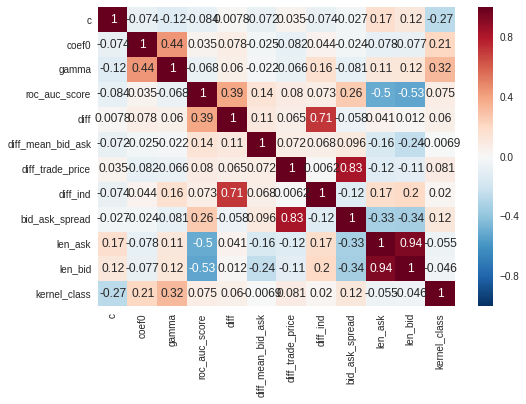

In [29]:
features = ['c', 'coef0', 'gamma', 'roc_auc_score', 'diff', 
            'diff_mean_bid_ask', 'diff_trade_price', 'diff_ind',
            'bid_ask_spread', 'len_ask', 'len_bid', 'kernel_class']

sns.heatmap(df_all[features].corr(), annot=True)

## Clustering

In [30]:
data_lens = []
for s in df_all.index:
    data_lens.append(len(dfs[s]))
df_all['data_len'] = data_lens
df_all.head()

,c,coef0,gamma,kernel,roc_auc_score,stock,log_res,diff,roc_area,sum_sell_ask_mean,...,min_trade_price,diff_trade_price,bid_ask_spread,pearson_corr1,pearson_corr2,len_ask,len_bid,diff_ind,kernel_class,data_len
stock,,,,,,,,,,,,,,,,,,,,,
10166,0.500,0.5,5000.0000,sigmoid,0.572526,10166,0.557152,0.015374,0.557152,738.760644,...,3038.0,416.5,1.150248,-0.024122,0.125279,1222,1446,1,2,4040
10470,5.000,0.0,0.5000,rbf,0.622024,10470,0.545093,0.076931,0.545093,908.843069,...,2210.0,300.0,1.837871,0.072315,0.000004,686,706,1,1,4040
10484,0.001,10.0,0.0001,sigmoid,0.575059,10484,0.539201,0.035858,0.539201,2827.489851,...,314.6,31.6,0.298045,0.016667,0.289558,694,660,1,2,4040
10508,100.000,0.0,10.0000,rbf,0.586053,10508,0.579529,0.006524,0.579529,3490.456436,...,341.4,37.4,0.229802,-0.056934,0.000294,719,753,1,1,4040
10795,0.005,0.5,5.0000,sigmoid,0.635927,10795,0.624529,0.011398,0.624529,2353.274010,...,1440.0,204.0,1.566832,-0.046162,0.003338,597,598,1,2,4040


In [31]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
a_features = ['len_bid', 'len_ask', 'bid_ask_spread',
            'max_trade_price', 'min_trade_price', 'sum_sell_ask_mean',
           'sum_buy_bid_mean']

features = ['len_bid', 'len_ask', 
           'sum_sell_ask_mean', 'sum_buy_bid_mean']

X = df_all[features]

kmeans = KMeans(n_clusters=2, random_state=None).fit_predict(X)
df_all['del'] = kmeans

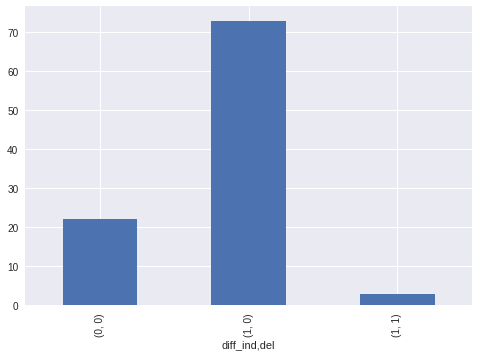

In [32]:
df_all.groupby(['diff_ind', 'del'])['del'].count().plot(kind='bar')

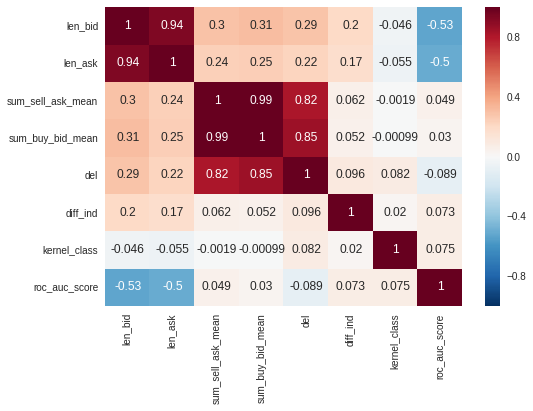

In [33]:

sns.heatmap(df_all[features + ['del', 'diff_ind', 'kernel_class', 'roc_auc_score' ]].corr(), 
            annot=True)

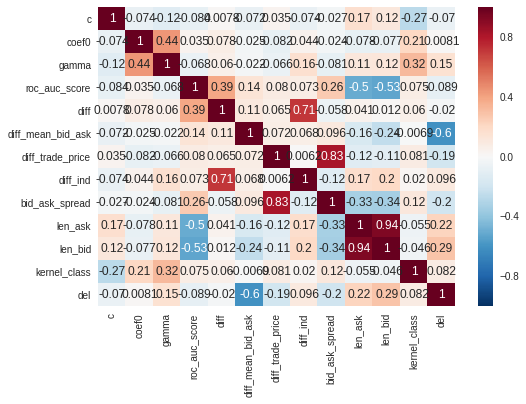

In [34]:
features = ['c', 'coef0', 'gamma', 'roc_auc_score', 'diff', 
            'diff_mean_bid_ask', 'diff_trade_price', 'diff_ind',
            'bid_ask_spread', 'len_ask', 'len_bid', 'kernel_class', 'del']
sns.heatmap(df_all[features].corr(), annot=True)

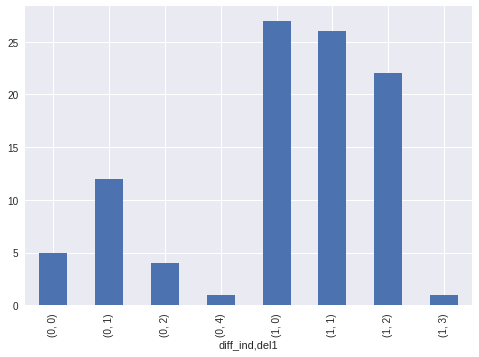

In [35]:
from sklearn.cluster import SpectralClustering, MeanShift, AffinityPropagation 
from sklearn.decomposition import PCA
a_features = ['len_bid', 'len_ask', 'bid_ask_spread', 
            'max_trade_price', 'min_trade_price', 'sum_sell_ask_mean',
           'sum_buy_bid_mean']
features = [  'bid_ask_spread', 
            ]

X = df_all[features]

kmeans = MeanShift().fit_predict(X)
df_all['del1'] = kmeans
df_all.groupby(['diff_ind', 'del1'])['del1'].count().plot(kind='bar')

### Check bad ones

In [38]:
f = ['sum_sell_ask_mean', 'sum_buy_bid_mean',
       'diff_mean_bid_ask', 'max_trade_price', 'min_trade_price',
       'diff_trade_price', 'bid_ask_spread', 'pearson_corr1', 'pearson_corr2',
       'len_ask', 'len_bid', 'data_len']
print(len(df_all[f][df_all['diff'] < 0]))
df_all[f][df_all['diff'] < 0]

22


,sum_sell_ask_mean,sum_buy_bid_mean,diff_mean_bid_ask,max_trade_price,min_trade_price,diff_trade_price,bid_ask_spread,pearson_corr1,pearson_corr2,len_ask,len_bid,data_len
stock,,,,,,,,,,,,
1080,3995.247772,3862.881188,132.366584,1201.00,1048.0,153.00,1.457178,0.064864,3.693401e-05,662,514,4040
11234,11040.661634,10923.490842,117.170792,1176.00,1084.0,92.00,1.293317,0.011496,4.650862e-01,839,956,4040
11399,1589.196782,1532.211634,56.985149,1719.00,1430.0,289.00,1.672525,0.015809,3.150921e-01,1049,620,4040
11618,4378.882426,4581.244802,-202.362376,576.50,492.2,84.30,0.778985,0.069651,9.374469e-06,872,727,4040
11946,16690.194554,17977.495792,-1287.301238,203.40,184.0,19.40,0.183589,0.076700,1.056573e-06,906,736,4040
12098,2370.731931,2356.616584,14.115347,1285.00,1146.0,139.00,1.505198,-0.049129,1.786601e-03,420,425,4040
1229,4914.947772,5089.941337,-174.993564,960.00,851.5,108.50,0.684035,0.013464,3.922475e-01,761,790,4040
12327,1656.023762,2113.350248,-457.326485,1944.00,1759.0,185.00,1.814604,-0.014984,3.410334e-01,629,773,4040
1243,3853.490099,4030.764604,-177.274505,1140.00,961.5,178.50,1.152970,-0.008074,6.079218e-01,1146,920,4040


In [37]:
df_all[f].describe()

,sum_sell_ask_mean,sum_buy_bid_mean,diff_mean_bid_ask,max_trade_price,min_trade_price,diff_trade_price,bid_ask_spread,pearson_corr1,pearson_corr2,len_ask,len_bid,data_len
count,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,9.800000e+01,98.000000,98.000000,98.0
mean,5438.057635,5528.125333,-90.067698,1415.864796,1257.100306,158.764490,1.017330,0.013171,1.949240e-01,1023.591837,1006.265306,4040.0
std,7063.908253,7377.395152,861.882113,1151.998267,1026.584911,139.017815,0.831524,0.050326,2.695802e-01,487.435787,448.861895,0.0
min,272.028465,289.683416,-4455.765842,79.850000,73.280000,6.570000,0.026161,-0.092854,6.131742e-16,420.000000,425.000000,4040.0
25%,1904.984344,1937.924196,-176.704270,449.100000,391.550000,47.150000,0.278063,-0.020837,9.580368e-05,713.000000,697.500000,4040.0
50%,3440.336634,3340.499134,-40.505446,1198.000000,1023.500000,132.000000,0.819864,0.011798,3.144980e-02,889.000000,901.500000,4040.0
75%,5924.624938,5796.537562,122.528280,1869.250000,1672.500000,219.250000,1.561139,0.048365,3.407266e-01,1130.250000,1109.250000,4040.0
max,42983.784901,47439.550743,4249.247030,5605.000000,4911.000000,694.000000,5.563119,0.126753,9.792167e-01,3016.000000,2584.000000,4040.0
